# 1. plot data magnitude vs timestamp

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
import requests
import seaborn as sns 
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')
#print(mnv.version)  # Last updated for mnv v2.0.1
from datetime import datetime
from dateutil.relativedelta import relativedelta
from tkinter import filedialog
from tkinter import *
import bokeh.plotting as bp
import bokeh.models as bm
import bokeh.layouts as bl
from bokeh.models import HoverTool
#open files gui dependencies
from tkinter import *
from tkinter.filedialog import askopenfilenames
#html block
from bokeh.util.browser import view
from bokeh.document import Document
from bokeh.embed import file_html
from bokeh.layouts import column, gridplot
from bokeh.models import  ColumnDataSource, Div, Grid, Line, LinearAxis, Plot, Range1d
from bokeh.resources import INLINE

In [35]:
cat D1_C1_6.20.19_freqSweep_1-cell.csv

10
System Phase Shift: 0.00
TIME,REAL 1,IMAGINARY 1,PHASE 1,SYSTEM PHASE 1,CONDUCTANCE 1,IMPEDANCE 1,REAL 2,IMAGINARY 2,PHASE 2,SYSTEM PHASE 2,CONDUCTANCE 2,IMPEDANCE 2,REAL 3,IMAGINARY 3,PHASE 3,SYSTEM PHASE 3,CONDUCTANCE 3,IMPEDANCE 3,REAL 4,IMAGINARY 4,PHASE 4,SYSTEM PHASE 4,CONDUCTANCE 4,IMPEDANCE 4,REAL 5,IMAGINARY 5,PHASE 5,SYSTEM PHASE 5,CONDUCTANCE 5,IMPEDANCE 5,REAL 6,IMAGINARY 6,PHASE 6,SYSTEM PHASE 6,CONDUCTANCE 6,IMPEDANCE 6,REAL 7,IMAGINARY 7,PHASE 7,SYSTEM PHASE 7,CONDUCTANCE 7,IMPEDANCE 7,REAL 8,IMAGINARY 8,PHASE 8,SYSTEM PHASE 8,CONDUCTANCE 8,IMPEDANCE 8,REAL 9,IMAGINARY 9,PHASE 9,SYSTEM PHASE 9,CONDUCTANCE 9,IMPEDANCE 9,REAL 10,IMAGINARY 10,PHASE 10,SYSTEM PHASE 10,CONDUCTANCE 10,IMPEDANCE 10,REAL 11,IMAGINARY 11,PHASE 11,SYSTEM PHASE 11,CONDUCTANCE 11,IMPEDANCE 11,REAL 12,IMAGINARY 12,PHASE 12,SYSTEM PHASE 12,CONDUCTANCE 12,IMPEDANCE 12,REAL 13,IMAGINARY 13,PHASE 13,SYSTEM PHASE 13,CONDUCTANCE 13,IMPEDANCE 13,REAL 14,IMAGINARY 14,PHASE 14,SYSTEM PHASE 14,CONDUCTANCE 1

141.06,5211.59,-4447.20,-0.71,-1.91,2.91,6851.15,5036.61,-4360.05,-0.71,-1.92,3.01,6661.64,5279.88,-4288.42,-0.68,-1.88,2.88,6802.04,5344.71,-4375.16,-0.69,-1.89,2.84,6907.10,5301.77,-4297.86,-0.68,-1.88,2.86,6824.98,5310.96,-4350.90,-0.69,-1.89,2.86,6865.61,4892.17,-4336.05,-0.73,-1.93,3.10,6537.18,4999.66,-4407.21,-0.72,-1.92,3.04,6664.84,4983.97,-4656.25,-0.75,-1.95,3.05,6820.60,5169.47,-4872.51,-0.76,-1.96,2.94,7103.86,5155.17,-4926.34,-0.76,-1.96,2.95,7130.54,5659.02,-5313.44,-0.75,-1.96,2.68,7762.55,5558.65,-5047.22,-0.74,-1.94,2.73,7508.20,5598.94,-4985.32,-0.73,-1.93,2.71,7496.77,5524.84,-4943.67,-0.73,-1.93,2.75,7413.75,5551.98,-5193.62,-0.75,-1.95,2.74,7602.51,5461.31,-4898.08,-0.73,-1.93,2.78,7336.02,5455.11,-4850.91,-0.73,-1.93,2.78,7299.97,5647.34,-5127.89,-0.74,-1.94,2.69,7628.09,5741.44,-5361.39,-0.75,-1.95,2.64,7855.48,5584.85,-5723.02,-0.80,-2.00,2.72,7996.47,5494.85,-6714.29,-0.88,-2.09,2.76,8676.12,6335.88,-6032.55,-0.76,-1.96,2.40,8748.44,6151.16,-6637.05,-0.82,-2.0

235.22,4629.11,-2331.86,-0.47,-1.15,3.28,5183.26,4478.08,-2237.94,-0.46,-1.15,3.39,5006.15,4639.73,-2230.01,-0.45,-1.13,3.27,5147.82,4623.34,-2284.55,-0.46,-1.14,3.28,5156.98,4617.96,-2239.44,-0.45,-1.14,3.29,5132.32,4616.01,-2255.59,-0.45,-1.14,3.29,5137.63,4286.96,-2196.95,-0.47,-1.16,3.54,4817.12,4352.34,-2255.53,-0.48,-1.16,3.49,4902.07,4361.57,-2345.09,-0.49,-1.18,3.48,4952.05,4408.14,-2491.97,-0.51,-1.20,3.44,5063.76,4482.78,-2519.80,-0.51,-1.20,3.39,5142.44,4862.05,-2703.92,-0.51,-1.19,3.12,5563.33,4830.98,-2565.76,-0.49,-1.17,3.14,5470.05,4874.13,-2536.62,-0.48,-1.17,3.12,5494.68,4801.53,-2510.91,-0.48,-1.17,3.16,5418.43,4809.29,-2632.00,-0.50,-1.19,3.16,5482.40,4739.01,-2488.63,-0.48,-1.17,3.20,5352.71,4728.59,-2479.57,-0.48,-1.17,3.21,5339.28,4880.68,-2660.92,-0.50,-1.18,3.11,5558.91,4935.08,-2788.86,-0.51,-1.20,3.08,5668.58,4842.06,-2925.22,-0.54,-1.23,3.14,5657.08,4639.75,-3455.86,-0.64,-1.33,3.27,5785.35,5582.76,-3118.73,-0.51,-1.19,2.72,6394.81,5481.29,-3360.62,-0.55,-1.2

313.75,5052.70,-2151.99,-0.40,-0.83,3.01,5491.89,4318.40,-1805.33,-0.40,-0.82,3.52,4680.58,4464.95,-1811.94,-0.39,-0.81,3.40,4818.60,4436.91,-1849.63,-0.39,-0.82,3.42,4807.00,4440.55,-1812.22,-0.39,-0.81,3.42,4796.10,4436.90,-1821.23,-0.39,-0.82,3.42,4796.14,4136.67,-1753.51,-0.40,-0.83,3.67,4492.98,4192.92,-1799.12,-0.41,-0.83,3.62,4562.61,4214.50,-1868.19,-0.42,-0.84,3.60,4610.01,4237.75,-1994.39,-0.44,-0.87,3.58,4683.60,4320.23,-2025.90,-0.44,-0.87,3.51,4771.65,4685.60,-2173.18,-0.43,-0.86,3.24,5165.03,4667.73,-2052.75,-0.41,-0.84,3.25,5099.17,4707.22,-2028.22,-0.41,-0.83,3.23,5125.58,4637.10,-2015.89,-0.41,-0.84,3.27,5056.34,4640.51,-2105.56,-0.43,-0.85,3.27,5095.86,4573.83,-1995.36,-0.41,-0.84,3.32,4990.13,4560.58,-1984.68,-0.41,-0.84,3.33,4973.71,4697.70,-2139.95,-0.43,-0.85,3.23,5162.15,4748.13,-2249.38,-0.44,-0.87,3.20,5254.00,4667.64,-2350.59,-0.47,-0.89,3.25,5226.11,4448.36,-2794.00,-0.56,-0.99,3.41,5253.03,5384.47,-2505.26,-0.44,-0.86,2.82,5938.76,5307.49,-2705.20,-0.47,-0.9

In [131]:
def first_read_csv(filename): 
    rowdata = pd.read_csv("filename")
    skipped_rows = 0
    index = 0
    for row in rowdata.iterrows():
        if row[0] == "TIME":
            skipped_rows = index + 1
            index +=1
            return pd.read_csv("filename", skiprows = skipped_rows)

In [132]:
aa = first_read_csv(D1_C1_6.20.19_freqSweep_1-cell.csv)

SyntaxError: invalid syntax (<ipython-input-132-9e42b4e5334f>, line 1)

In [138]:
pd.read_csv("D1_C1_6.20.19_freqSweep_1-cell.csv", skiprows =2)

TIME    REAL 1  IMAGINARY 1  PHASE 1  SYSTEM PHASE 1  CONDUCTANCE 1  \
0      10.00       NaN          NaN      NaN             NaN            NaN   
1       0.60  28185.18    -19549.33    -0.61           -2.08           0.54   
2       0.96   6669.09    -10583.91    -1.01           -2.48           2.28   
3       1.33   6650.56    -10513.57    -1.01           -2.48           2.28   
4       1.70   6661.97    -10395.36    -1.00           -2.47           2.28   
5       2.07   6649.18    -10404.06    -1.00           -2.47           2.28   
6       2.43   6642.59    -10375.68    -1.00           -2.47           2.29   
7       2.80   6649.63    -10335.86    -1.00           -2.47           2.28   
8       3.17   6660.96    -10224.14    -0.99           -2.46           2.28   
9       3.54   6680.56    -10082.62    -0.99           -2.45           2.27   
10      3.91   6654.97    -10193.67    -0.99           -2.46           2.28   
11      4.27   6685.90    -10003.96    -0.98           -2.45           2.27   
12      4.64   6665.67    -10140.41    -0.99           -2.46           2.28   
13      5.01   6684.47     -9988.21    -0.98           -2.45           2.27   
14      5.37   6673.80    -10003.40    -0.98           -2.45           2.28   
15      5.74   6641.74    -10117.20    -0.99           -2.46           2.29   
16      6.11   6663.12     -9957.45    -0.98           -2.45           2.28   
17      6.48   6663.42     -9966.67    -0.98           -2.45           2.28   
18      6.84   6632.82    -10086.38    -0.99           -2.46           2.29   
19      7.21   6647.08    -10010.63    -0.98           -2.45           2.28   
20      7.58   6676.35     -9891.75    -0.98           -2.45           2.27   
21      7.95   6669.30     -9977.58    -0.98           -2.45           2.28   
22      8.31   6709.20     -9763.82    -0.97           -2.44           2.26   
23      8.68   6682.30     -9839.50    -0.97           -2.44           2.27   
24      9.05   6681.10     -9896.13    -0.98           -2.45           2.27   
25      9.41   6664.78     -9951.87    -0.98           -2.45           2.28   
26      9.78   6690.95     -9776.56    -0.97           -2.44           2.27   
27     10.15   6712.38     -9741.10    -0.97           -2.44           2.26   
28     10.52   6700.01     -9829.55    -0.97           -2.44           2.27   
29     10.89   6701.19     -9749.86    -0.97           -2.44           2.27   
...      ...       ...          ...      ...             ...            ...   
1225  322.04   5123.93     -2197.28    -0.41           -0.83           2.96   
1226  322.26   5030.61     -2154.46    -0.40           -0.83           3.02   
1227  322.48   5172.68     -2207.66    -0.40           -0.83           2.94   
1228  322.71   5033.55     -2155.40    -0.40           -0.83           3.02   
1229  322.93   4969.37     -2113.98    -0.40           -0.83           3.06   
1230  323.16   5021.01     -2136.32    -0.40           -0.83           3.02   
1231  323.38   5004.01     -2137.75    -0.40           -0.83           3.03   
1232  323.60   4981.12     -2121.97    -0.40           -0.83           3.05   
1233  323.83   5145.00     -2193.33    -0.40           -0.83           2.95   
1234  324.05   5167.76     -2209.38    -0.40           -0.83           2.94   
1235  324.28   4980.19     -2103.12    -0.40           -0.83           3.05   
1236  324.50   5028.02     -2137.75    -0.40           -0.83           3.02   
1237  324.72   5032.68     -2149.17    -0.40           -0.83           3.02   
1238  324.95   5087.20     -2169.05    -0.40           -0.83           2.98   
1239  325.17   5110.38     -2179.70    -0.40           -0.83           2.97   
1240  325.39   5128.98     -2196.20    -0.40           -0.83           2.96   
1241  325.62   5190.28     -2224.39    -0.40           -0.83           2.93   
1242  325.84   4996.30     -2124.98    -0.40           -0.83           3.04   
1243  326.07   5042.31     -2152.35    -0.40           -0.

In [142]:
a = pd.read_csv("D1_C1_6.20.19_freqSweep_1-cell.csv", skiprows =2)

In [143]:
filtered_a= a.filter(items = ['TIME','REAL 1']) 

In [144]:
filtered_a[:254]

TIME    REAL 1
0    10.00       NaN
1     0.60  28185.18
2     0.96   6669.09
3     1.33   6650.56
4     1.70   6661.97
5     2.07   6649.18
6     2.43   6642.59
7     2.80   6649.63
8     3.17   6660.96
9     3.54   6680.56
10    3.91   6654.97
11    4.27   6685.90
12    4.64   6665.67
13    5.01   6684.47
14    5.37   6673.80
15    5.74   6641.74
16    6.11   6663.12
17    6.48   6663.42
18    6.84   6632.82
19    7.21   6647.08
20    7.58   6676.35
21    7.95   6669.30
22    8.31   6709.20
23    8.68   6682.30
24    9.05   6681.10
25    9.41   6664.78
26    9.78   6690.95
27   10.15   6712.38
28   10.52   6700.01
29   10.89   6701.19
..     ...       ...
224  82.52   6748.74
225  82.89   6762.62
226  83.25   6769.65
227  83.62   6745.52
228  83.99   6714.14
229  84.36   6715.63
230  84.72   6722.48
231  85.09   6731.39
232  85.46   6768.06
233  85.83   6741.55
234  86.19   6759.67
235  86.56   6729.61
236  86.93   6764.79
237  87.30   6761.17
238  87.66   6764.12
239  88.03   6767.47
240  88.40   6773.87
241  88.77   6772.21
242  89.14   6776.88
243  89.50   6747.21
244  89.87   6737.04
245  90.24   6751.97
246  90.61   6742.77
247  90.97   6760.07
248  91.34   6757.09
249  91.71   6770.43
250  92.08   6763.86
251  32.00       NaN
252  92.48   5209.40
253  92.74   5209.89

[254 rows x 2 columns]

In [166]:
def trim_impedance(rowdata): #ignore data over 10,000
    columns = list(filter(lambda x: "IMPEDANCE" in x, list(rowdata)))
    rowdata = rowdata.mask(rowdata[columns] < 10_000)
    for column in columns:
        rowdata[column] = rowdata[column].shift(-(rowddata[column].first_valid_index() + 1))
    return rowdata

In [174]:
b = filtered_a.mask(filtered_a > 10_000)

In [177]:
filtered_a.mask(filtered_a > 10_000)

TIME   REAL 1
0      10.00      NaN
1       0.60      NaN
2       0.96  6669.09
3       1.33  6650.56
4       1.70  6661.97
5       2.07  6649.18
6       2.43  6642.59
7       2.80  6649.63
8       3.17  6660.96
9       3.54  6680.56
10      3.91  6654.97
11      4.27  6685.90
12      4.64  6665.67
13      5.01  6684.47
14      5.37  6673.80
15      5.74  6641.74
16      6.11  6663.12
17      6.48  6663.42
18      6.84  6632.82
19      7.21  6647.08
20      7.58  6676.35
21      7.95  6669.30
22      8.31  6709.20
23      8.68  6682.30
24      9.05  6681.10
25      9.41  6664.78
26      9.78  6690.95
27     10.15  6712.38
28     10.52  6700.01
29     10.89  6701.19
...      ...      ...
1225  322.04  5123.93
1226  322.26  5030.61
1227  322.48  5172.68
1228  322.71  5033.55
1229  322.93  4969.37
1230  323.16  5021.01
1231  323.38  5004.01
1232  323.60  4981.12
1233  323.83  5145.00
1234  324.05  5167.76
1235  324.28  4980.19
1236  324.50  5028.02
1237  324.72  5032.68
1238  324.95  5087.20
1239  325.17  5110.38
1240  325.39  5128.98
1241  325.62  5190.28
1242  325.84  4996.30
1243  326.07  5042.31
1244  326.29  5056.66
1245  326.51  4920.58
1246  326.74  5129.03
1247  326.96  5060.28
1248  327.19  5036.94
1249  327.41  5176.89
1250  327.63  5155.25
1251  327.86  5151.67
1252  328.08  5132.71
1253  328.30  5118.07
1254  328.53  5085.56

[1255 rows x 2 columns]

In [169]:
trim_impedance(filtered_a)

TIME  REAL 1
0      NaN     NaN
1      NaN     NaN
2      NaN     NaN
3      NaN     NaN
4      NaN     NaN
5      NaN     NaN
6      NaN     NaN
7      NaN     NaN
8      NaN     NaN
9      NaN     NaN
10     NaN     NaN
11     NaN     NaN
12     NaN     NaN
13     NaN     NaN
14     NaN     NaN
15     NaN     NaN
16     NaN     NaN
17     NaN     NaN
18     NaN     NaN
19     NaN     NaN
20     NaN     NaN
21     NaN     NaN
22     NaN     NaN
23     NaN     NaN
24     NaN     NaN
25     NaN     NaN
26     NaN     NaN
27     NaN     NaN
28     NaN     NaN
29     NaN     NaN
...    ...     ...
1225   NaN     NaN
1226   NaN     NaN
1227   NaN     NaN
1228   NaN     NaN
1229   NaN     NaN
1230   NaN     NaN
1231   NaN     NaN
1232   NaN     NaN
1233   NaN     NaN
1234   NaN     NaN
1235   NaN     NaN
1236   NaN     NaN
1237   NaN     NaN
1238   NaN     NaN
1239   NaN     NaN
1240   NaN     NaN
1241   NaN     NaN
1242   NaN     NaN
1243   NaN     NaN
1244   NaN     NaN
1245   NaN     NaN
1246   NaN     NaN
1247   NaN     NaN
1248   NaN     NaN
1249   NaN     NaN
1250   NaN     NaN
1251   NaN     NaN
1252   NaN     NaN
1253   NaN     NaN
1254   NaN     NaN

[1255 rows x 2 columns]

In [ ]:
for 

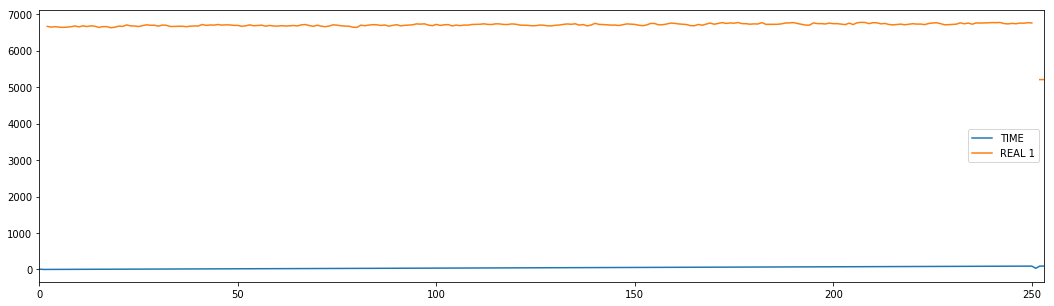

In [176]:
b[:254].plot(figsize = (18,5))